## Import data

### Load File

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Data
data_job = pd.read_csv("/content/kaggle_survey_2020_responses.csv")

display(data_job.head())


/tmp/ipython-input-3294044011.py:9: DtypeWarning: Columns (0,18,31,45,50,63,80,92,99,100,105,130,143,171,187,213,241,254,266,278,289,307,322,330,342,353) have mixed types. Specify dtype option on import or set low_memory=False.
  data_job = pd.read_csv("/content/kaggle_survey_2020_responses.csv")


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check basic info of DataSet

In [2]:
# Display structure
print("Shape", data_job.shape)

print("Info:\n")
display(data_job.info())

# Display data types
display(data_job.dtypes)

# Describe
display(data_job.describe())

# Respondents (rows without first one which is the description of questions)
print('Total number of respondents: ', data_job.shape[0] - 1)

Shape (18976, 355)
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18976 entries, 0 to 18975
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 51.4+ MB


None

,0
Time from Start to Finish (seconds),object
Q1,object
Q2,object
Q3,object
Q4,object
...,...
Q35_B_Part_7,object
Q35_B_Part_8,object
Q35_B_Part_9,object
Q35_B_Part_10,object


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,18976,18976,18976,18976,18527,18250,18104,14708,4052,7134,...,1123,465,408,3039,528,464,801,491,1,243
unique,5029,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,1,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,31,3786,14945,5539,7443,4894,4303,14707,4051,7133,...,1122,464,407,3038,527,463,800,490,1,242


Total number of respondents:  18975


## Data Cleaning (Before concat)

### Handling duplicates


In [3]:
# New dataFrame for cleaning (re-run cell if any problem with cleaning)
df_clean = data_job.copy()

In [4]:
# nbr de doublon
df_clean.duplicated().sum() # 14

# voir les doublons
duplicated = df_clean[df_clean.duplicated()]
duplicated

# Remove duplicates
# supprimer car que des NA
df_clean = df_clean.drop_duplicates(keep='first')
df_clean.duplicated().sum() #  0 duplicates

# Remove unnecesary first row (description) and first column (time)
df_clean = df_clean.loc[1:,"Q1" :]

#  Now there is a lot of duplicates (344), because of similarity in answers
# df_clean.duplicated().sum() # 344


### Remove unnecesary columns

In [5]:
# Create a tuple with the name of the unnecessary columns (to be deleted)
unnecesary_questions = "Q11","Q12", "Q13", "Q25","Q30", "Q32", "Q36", "Q37","Q39"

# Select the columns that matches these questions
columns_to_delete = [col for col in df_clean.columns if col.startswith(unnecesary_questions)]
columns_to_delete
df_clean = df_clean.drop(columns = columns_to_delete)


### Replace NaNs

In [8]:
# Choices for NA (mean, mode, ...) explained in the document

# Question 4: Level of education
df_clean.loc[:, "Q4"] = df_clean["Q4"].fillna("I prefer not to answer")
# df_clean[["Q8"]].isna().sum() -> 0

# Q6, Q8: Remplacer les NaN par mode
df_clean[["Q6",'Q8']].isna().sum()
for col in ["Q6",'Q8']:
    mode_value = df_clean[col].mode()[0]
    df_clean.loc[:, col] = df_clean[col].fillna(mode_value)
# Check non null values
# df_clean[["Q6",'Q8']].isna().sum() -> 0;

# Drop rows where Q5 null (Not current role)
df_clean = df_clean.dropna(how = 'all', subset=["Q5"])
# Check non null values
# df_clean[["Q5"]].isna().sum() # -> 0

# Reindex new data Frame
df_clean.index = range(0, len(df_clean))


## Transform columns
Translate multichoice questions to only one column per question:
- Concatenate values in a list
- Replace empty strings with NaN
- Copy single choice columns directly

### Group columns by question

In [9]:
# List of multichoice questions
multiChoiceQuestions = {
  "Q7": 'Q7_',
  "Q9": 'Q9_',
  "Q10": 'Q10_',
  "Q14": 'Q14_',
  "Q16": 'Q16_',
  "Q17": 'Q17_',
  "Q18":'Q18_',
  "Q19": 'Q19_',
  'Q23': 'Q23_',
  "Q26A": 'Q26_A_',
  'Q27A': 'Q27_A_',
  'Q28A': 'Q28_A_',
  "Q29A": 'Q29_A_',
  "Q31A": 'Q31_A_',
  "Q33A": 'Q33_A_',
  "Q34A": 'Q34_A_',
  "Q35A": 'Q35_A_',
  "Q26B": 'Q26_B_',
  "Q27B": 'Q27_B_',
  "Q28B": 'Q28_B_',
  "Q29B": 'Q29_B_',
  "Q31B": 'Q31_B_',
  "Q33B": 'Q33_B_',
  "Q34B": 'Q34_B_',
  "Q35B": 'Q35_B_'
}

df_resume = pd.DataFrame()

# Create a mask to select only multichoice questions
for column_title, question_prefix in multiChoiceQuestions.items():
  prefixMask = df_clean.columns.str.startswith(question_prefix)

  # Assign values to new column (creating a list to optimize the explode)
  df_resume[column_title] = pd.Series([ row_values if row_values else np.nan  # Insert NaN if empty
    for row_values in ([str(value).strip() for value in row if value is not np.nan]
                       for row in df_clean.loc[:, prefixMask].values)])

# Then, assign single choice columns to new dataframe
question_prefixes = tuple(multiChoiceQuestions.values())
# Create a mask to select only single choice questions
singleChoiceMask = ~ df_clean.columns.str.startswith(question_prefixes)
singleChoiceColumns = df_clean.loc[:, singleChoiceMask].columns

# Duplicate single choice columns to new dataframe and transform to string
for column in singleChoiceColumns:
  df_resume[column] = df_clean[column].astype('string')


### Checking new data set

In [12]:
df_resume.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q7      18085 non-null  object
 1   Q9      18032 non-null  object
 2   Q10     17485 non-null  object
 3   Q14     17778 non-null  object
 4   Q16     17595 non-null  object
 5   Q17     17634 non-null  object
 6   Q18     16768 non-null  object
 7   Q19     16596 non-null  object
 8   Q23     10327 non-null  object
 9   Q26A    16795 non-null  object
 10  Q27A    4715 non-null   object
 11  Q28A    4299 non-null   object
 12  Q29A    16808 non-null  object
 13  Q31A    16655 non-null  object
 14  Q33A    6359 non-null   object
 15  Q34A    1899 non-null   object
 16  Q35A    6646 non-null   object
 17  Q26B    17067 non-null  object
 18  Q27B    16895 non-null  object
 19  Q28B    16832 non-null  object
 20  Q29B    16982 non-null  object
 21  Q31B    16880 non-null  object
 22  Q33B    16858 non-null

In [10]:
df_clean.loc[19273, df_clean.columns.str.startswith('Q10')]
a = [[str(value).strip() for value in row if value is not np.nan] for row in df_clean.loc[:, df_clean.columns.str.startswith('Q10')].values]
# df_resume.loc[19273, "Q10"]

KeyError: 19273

In [ ]:
# display(df_resume.columns)
((df_resume.isna().mean())*100).sort_values()
df_resume.shape
df_resume.info()
df_resume.head(20)
df_resume = df_resume.fillna('No Answer')
# Replace last Nans by "No Answer"

### Save DataFrame to CSV     

In [14]:
df_resume.to_csv('df_resume.csv', index=False)

#Exploratory Analysis


In [15]:
sns.set_theme(style="whitegrid")
# Description of questions
dictionnaire_noms = {
    'Q1': 'Âge',
    'Q2': 'Genre',
    'Q3': 'Pays',
    'Q4' : 'Niveau Education', # a voir
    'Q5': 'Poste',

    'Q9': 'IDE_utilisés',
    'Q7': 'Langages_utilisés',
    'Q8': 'Langage_recommandé_débutant',
    "Q6": "Experience Code",
    'Q10': 'Notebooks_utilisés',
    'Q14': 'Librairies_visualisation',
    'Q38': 'Outil_principal_analyse',

    "Q15" : "Experience ML",
    'Q16': 'Frameworks_ML_utilisés',
    'Q17': 'Algorithmes_ML_utilisés',
    'Q18' : 'Methode vision Ordinateur', # a voir
    'Q19': 'Méthodes_NLP_utilisées', # a voir desacord
    'Q22': 'ML_intégré_entreprise',
    'Q28A': 'Produits ML cloud', # a voir
    "Q34-B": "Outils spécifiques d’AutoML",# a voir
    "Q35-B": "Outils de gestion d’expériences de ML ", # a voir,

    "Q20": "Taille de l'entreprise", # desaccord
    "Q24": "Salaire", # a voir

    "Q21": "Nombre de Data Scientists", # desacord
    'Q23': 'Activités_principales_travail',
    'Q26A': 'Cloud_platforms_utilisées',
    'Q27A': 'Produits cloud utilisés', # a voir
    'Q31A': 'BI_outils_utilisés',

    "Q26-B": "Plateformes de cloud computing", # a voir
    "Q27-B": "Produits spécifiques de cloud computing", # a voir

    "Q28-B": "Produits de machine learning",# a voir
    "Q29-B": "Produits big data", # a voir
    'Q29A': 'BigData_outils_utilisés',
}

In [16]:
def explode_question(df, question_col):
    """
    Explode column "question_col" of dataframe "df"
    """
    df_return = df[[question_col]]
    # Modify to handle np.nan correctly by not converting it to string 'nan'
    # df_return[question_col] = pd.Series([ [str(value).strip() for value in row if value is not np.nan] if row else np.nan
                                        #  for row in df[question_col].values])
    df_return = df_return.explode(question_col)
    # display(df_return.shape)
    # Remove rows where the exploded value is the string 'nan'
    df_return = df_return[df_return[question_col].astype(str) != 'nan']
    # display(df_return.shape)

    df_return = df_return.reset_index(drop=True)

    df_return[question_col] = df_return[question_col].str.strip()
    return df_return

## Langages utilisées

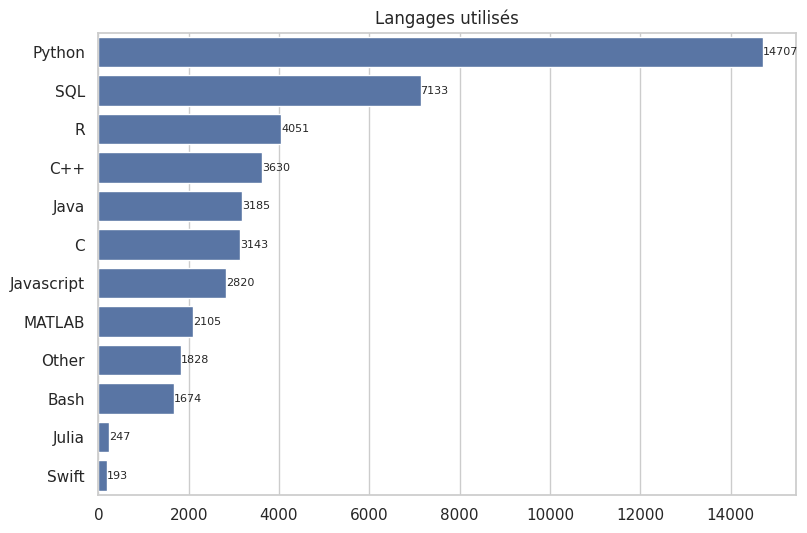

In [17]:
df_langages = explode_question(df_resume, 'Q7')
df_langages.shape
plt.figure(figsize=(9, 6))
# Get the order of languages by count
language_order = df_langages['Q7'].value_counts().index

# colors = sns.color_palette("viridis", len(language_order))

ax = sns.countplot(data=df_langages, y='Q7', order=language_order)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.title('Langages utilisés')
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

# Count lines with python
# df_python = df_resume['Q7'].apply(lambda x: 'Python' in x if isinstance(x, list) else False)

## Distribution par poste

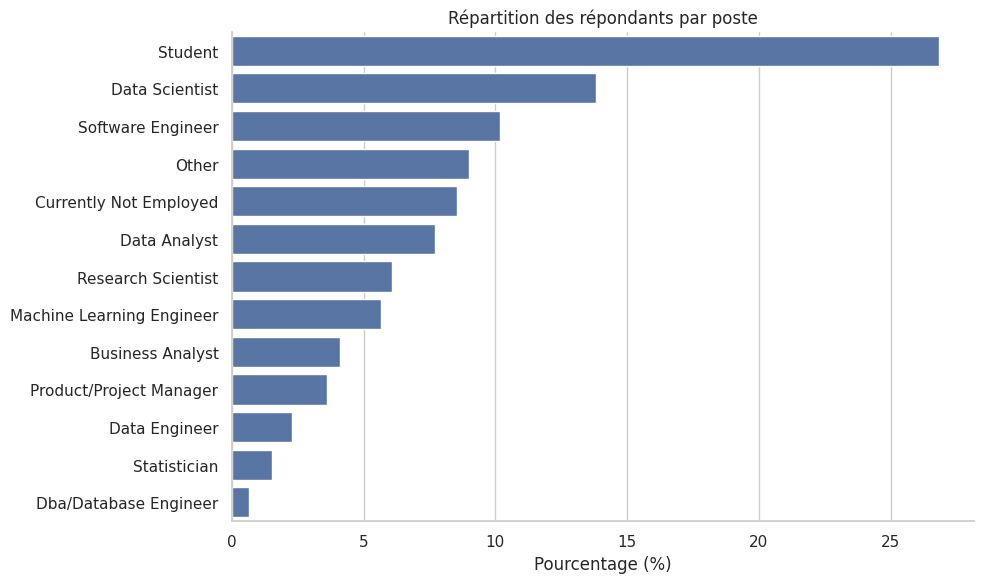

In [22]:
df_postes = df_resume['Q5'].str.title().value_counts(normalize=True).sort_values(ascending=False) * 100

df_postes = df_postes.reset_index()
# rename columns
df_postes.columns = ['Postes', 'Pourcentage']
# df_postes['Postes'] = df_postes['Postes'].str.title()

plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_postes, x='Pourcentage', y='Postes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Répartition des répondants par poste")
plt.xlabel("Pourcentage (%)")
plt.ylabel('')

plt.tight_layout()
plt.show()

## Répartition par age


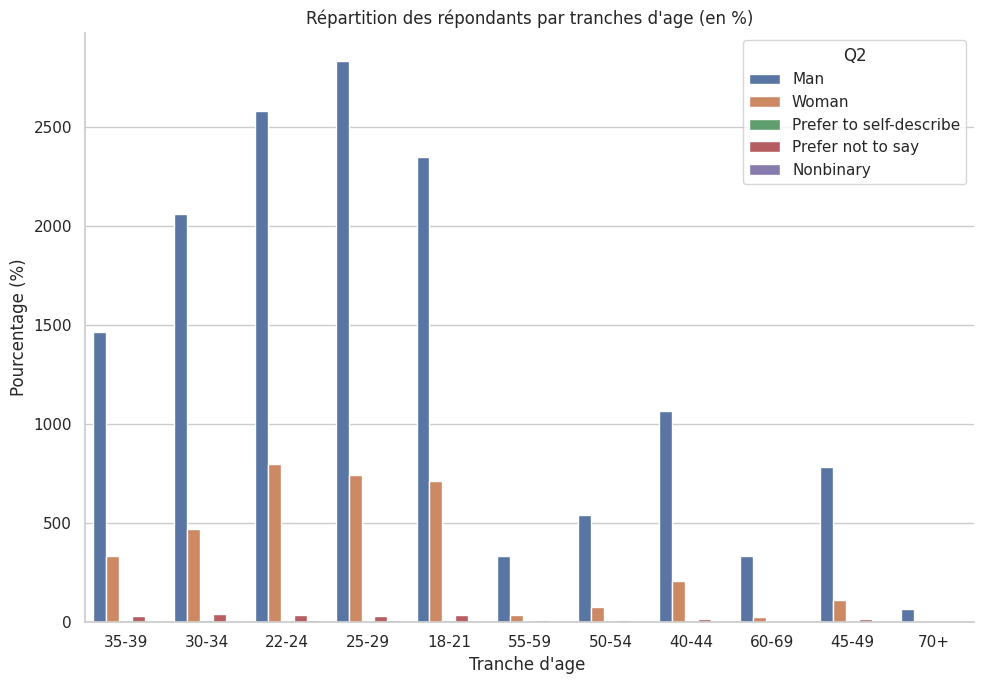

In [23]:
df_age = df_resume['Q1'].value_counts(normalize=True).sort_values(ascending=False)*100
df_age = df_age.reset_index()
df_age.columns = ["Tranche d'age" , 'Pourcentage']

plt.figure(figsize = (10,7))

# Supprimer le cadre (les spines) On garde juste 'bottom'
# ax = sns.barplot(data=df_age, y='Pourcentage', x="Tranche d'age",color='skyblue')
# Display a stacked barplot with variables Q1 as x and Q2 as legend
ax = sns.countplot(data=df_resume, x='Q1', hue="Q2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Tranche d'age ")
plt.ylabel('Pourcentage (%)')
plt.title( "Répartition des répondants par tranches d'age (en %)")
plt.tight_layout()
plt.show()

In [24]:
df_resume.groupby('Q1')['Q2'].value_counts(normalize=True).unstack()


Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,0.753455,0.001929,0.011572,0.003857,0.229187
22-24,0.750146,0.003494,0.011066,0.002330,0.232964
25-29,0.780535,0.003309,0.009374,0.002206,0.204577
30-34,0.796827,0.002709,0.015480,0.003483,0.181502
35-39,0.797600,0.003273,0.016367,0.001091,0.181669
40-44,0.824670,0.000776,0.010861,0.003879,0.159814
45-49,0.854189,0.001088,0.018498,0.003264,0.122960
50-54,0.861465,NaN,0.014331,0.003185,0.121019
55-59,0.869792,NaN,0.028646,NaN,0.101562


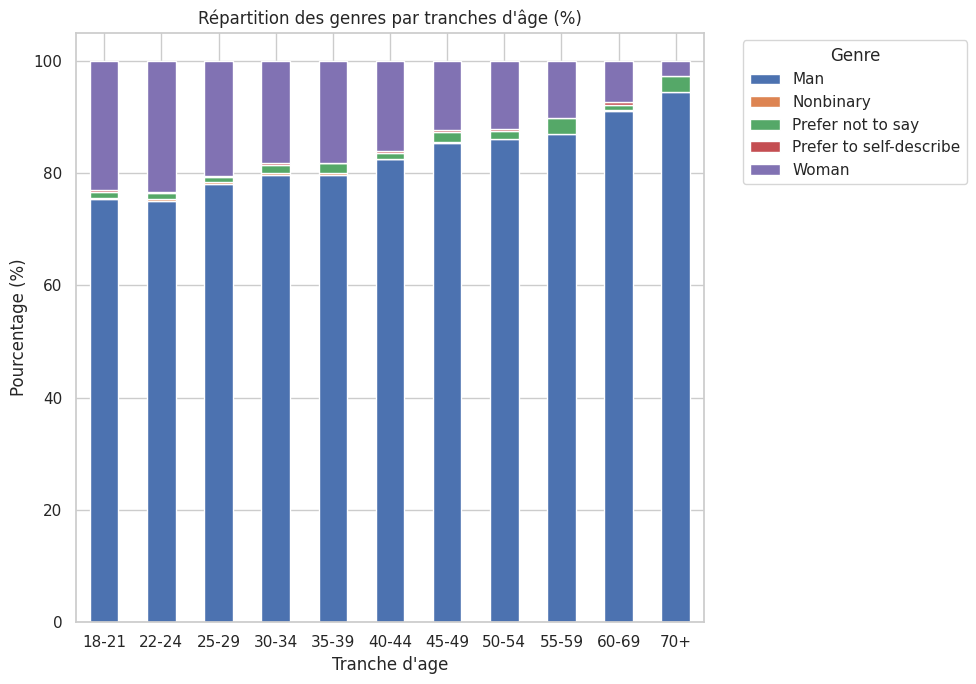

In [25]:
# Calculate the percentage of each gender within each age group
df_age_gender = df_resume.groupby('Q1')['Q2'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Sort age groups
age_order = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
df_age_gender = df_age_gender.reindex(age_order)

# Plot the stacked bar plot
ax = df_age_gender.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title("Répartition des genres par tranches d'âge (%)")
plt.xlabel("Tranche d'age")
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()